<a href="https://colab.research.google.com/github/ctarrington/try-colab/blob/master/binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from math import factorial
from matplotlib.pyplot import plot
from IPython import display


#Combinations
Given a set of n items how many distinct subsets of size k can you form? Order does not matter. 

EX: How many pairs of fruit can you pick from {apple, banana, pear}?

Spoken as "n choose k"  

Written as 
$n \choose k$ = $ \frac{n!}{k! (n-k)!}$

In [0]:
def comb(n,k):
  return factorial(n)/(factorial(k) * factorial(n-k))

There are 10 ways to choose 1 thing from 10 things.  
There is only one way to choose 10 things from a set of 10 things.  
There are 252 ways to choose 5 things from a set of 10 things.


In [12]:
comb10_1 = '{10 \choose 1 } = ' + str(int(comb(10, 1)))
comb10_10 = '{10 \choose 10 } = ' + str(int(comb(10, 10)))
comb10_5 = '{10 \choose 5 } = ' + str(int(comb(10, 5)))

display.display(display.Math(comb10_1 +',  '+ comb10_10 +',  '+ comb10_5))

<IPython.core.display.Math object>

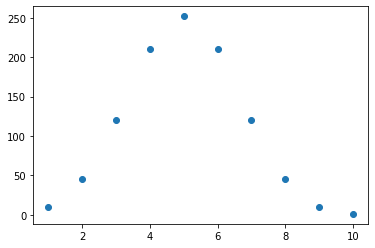

In [13]:
xs = range(1,11)
ys = [comb(10, k) for k in xs]
plot(xs, ys, 'o')

# Binomial Distribution
Given n binary trials, what is the probability of k sucesses assuming that the probability of sucess in a single trial is p?

Binomial = ${n \choose k} p^k (1-p)^{(n-k)}$

In [0]:
def binomial(n,p):
  def distribution(k):
    return comb(n, k) * p**k * (1-p)**(n-k)

  return distribution

## Examples

In [0]:
# n = 7, p = 1/5
p = binomial(7,1/5)

In [16]:
# Probability of at least 2 sucesses
sum([p(k) for k in range(2,8)])

0.4232832000000002

In [0]:
# n = 25, p = 1/10
p2 = binomial(25,1/10)


In [18]:
# Probability of at least 2 sucesses
sum([p2(k) for k in range(2,26)])

0.7287940935386341

# Working Backwards
Given a sample outcome, what can we learn about the single trial probability of sucess?

EX: If we had 60 heads in 100 trials what does that tell us about a single throw?



In [0]:
def binomial_p(n,k):
  def distribution(p):
    return comb(n, k) * p**k * (1-p)**(n-k)

  return distribution

In [0]:
step = 1
trial_ps = [p/1000 for p in range(0,1000+step, step)]

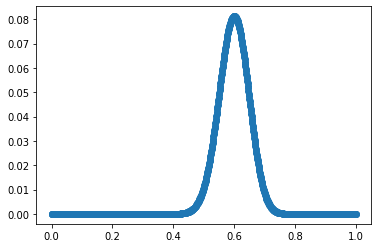

In [29]:
binomial_100_60 = binomial_p(100, 60)
probabilities = [binomial_100_60(p) for p in trial_ps]
plot(trial_ps, probabilities, 'o')

Note: The shape is useful, but this is not a pmf - it doesn't integrate to 1.


In [30]:
sum(probabilities)

9.90099009900989